In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("1.04. Real-life example.csv")
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
df = df.drop("Model",axis=1)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [6]:
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
df = df.dropna(axis=0)
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

(<seaborn.axisgrid.FacetGrid at 0x1fafb0008f0>,
 <seaborn.axisgrid.FacetGrid at 0x1fa85764260>)

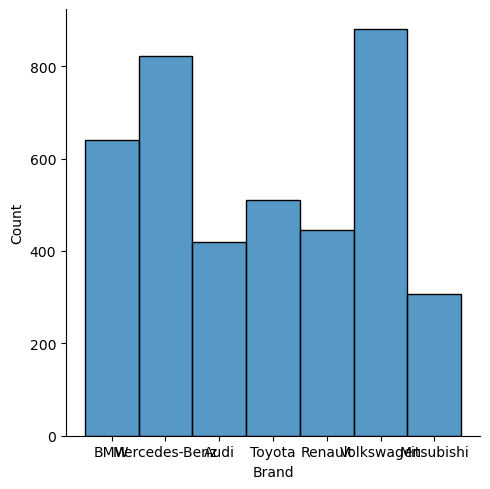

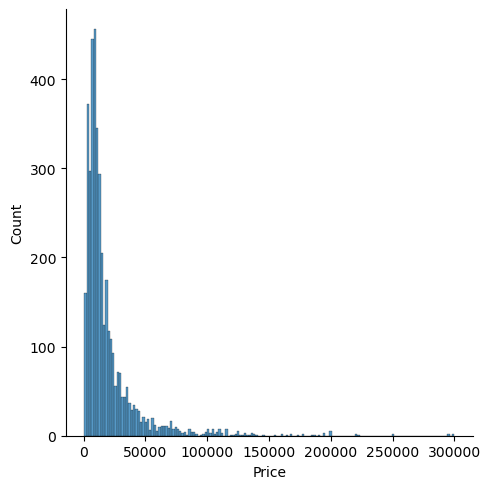

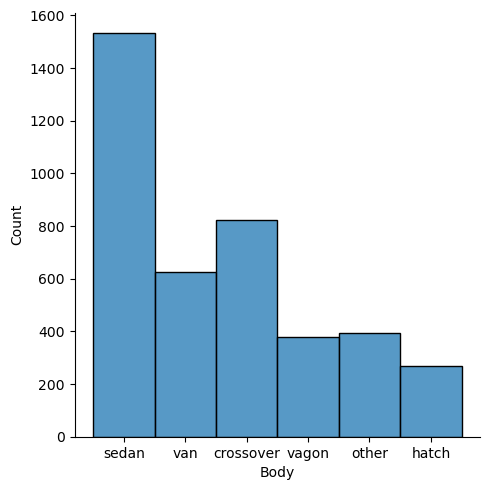

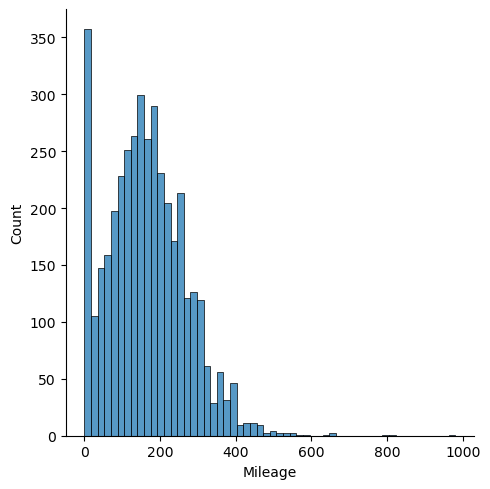

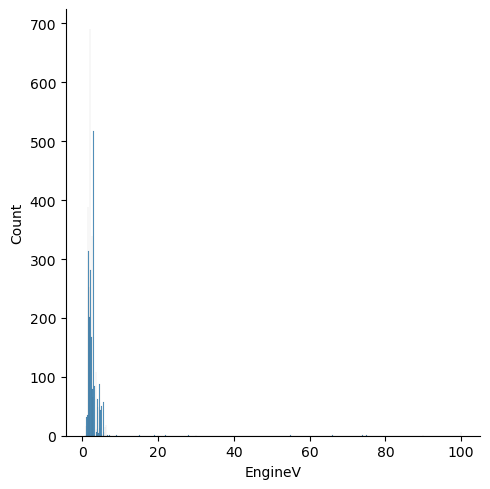

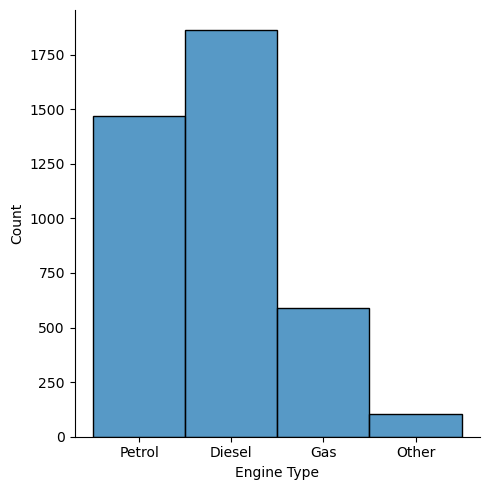

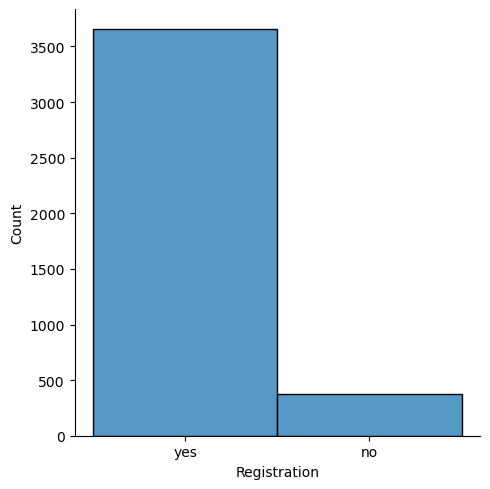

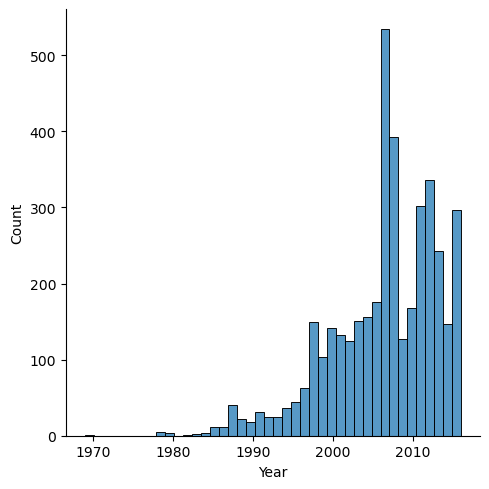

In [8]:
#Plotting distribution graph of all variables
sns.displot(df["Brand"]), sns.displot(df["Price"]), sns.displot(df["Body"]), sns.displot(df["Mileage"]), sns.displot(df["EngineV"]), sns.displot(df["Engine Type"]), sns.displot(df["Registration"]), sns.displot(df["Year"])

In [9]:
df.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [10]:
#checkpoint
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [11]:
#to revert
 
#df = df1.copy()

In [12]:
# outlier observed in Year, Price, Enginev, Mileage

q = df["Price"].quantile(0.99)
df = df[df["Price"]<q]

df = df[df["EngineV"]<6.5]

q= df["Mileage"].quantile(0.99)
df = df[df["Mileage"]<q]

q = df["Year"].quantile(0.01)
df = df[df["Year"]>q]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3867 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Price         3867 non-null   float64
 2   Body          3867 non-null   object 
 3   Mileage       3867 non-null   int64  
 4   EngineV       3867 non-null   float64
 5   Engine Type   3867 non-null   object 
 6   Registration  3867 non-null   object 
 7   Year          3867 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.9+ KB


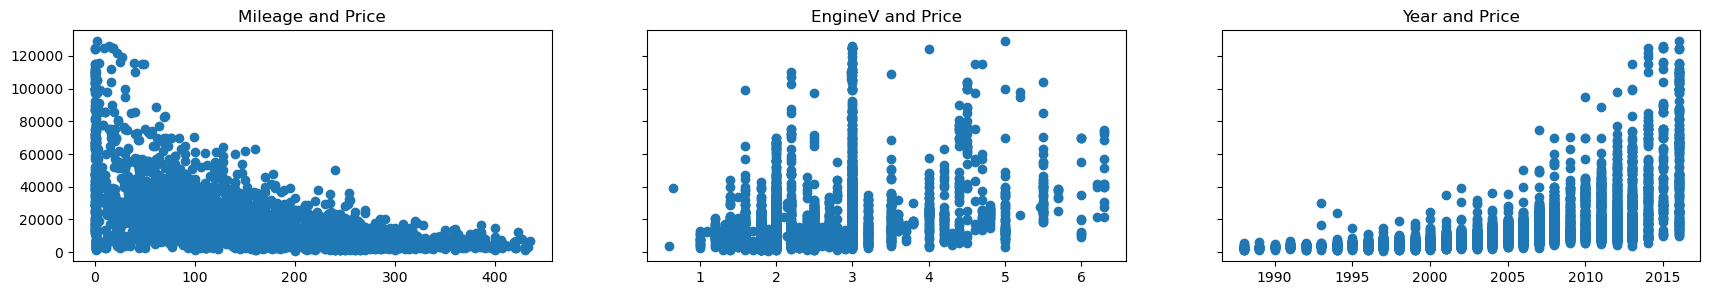

In [13]:
#plotting the df
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize = (21,3))

y = df["Price"]

ax1.scatter(df["Mileage"],y)
ax1.set_title("Mileage and Price")

ax2.scatter(df["EngineV"],y)
ax2.set_title("EngineV and Price")

ax3.scatter(df["Year"],y)
ax3.set_title("Year and Price")

plt.show()

In [14]:
#taking log of y axis
log_price = np.log(df["Price"])
df["Price"] = log_price

In [15]:
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,8.342840,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,8.974618,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes,2003
3,Audi,10.043249,crossover,240,4.2,Petrol,yes,2007
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,9.350102,van,163,2.5,Diesel,yes,2008
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,11.736069,sedan,9,3.0,Diesel,yes,2014
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes,1999


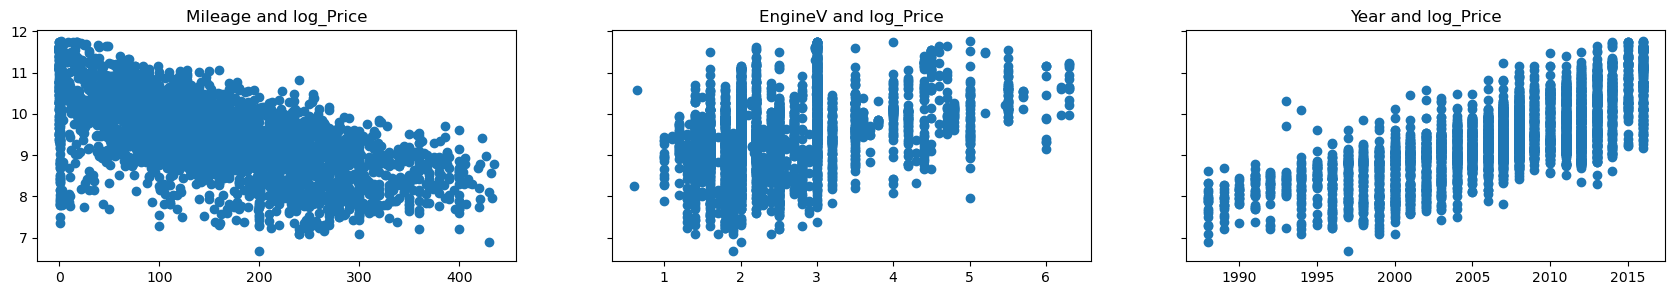

In [16]:
#plotting the df
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize = (21,3))

y = df["Price"]

ax1.scatter(df["Mileage"],y)
ax1.set_title("Mileage and log_Price")

ax2.scatter(df["EngineV"],y)
ax2.set_title("EngineV and log_Price")

ax3.scatter(df["Year"],y)
ax3.set_title("Year and log_Price")

plt.show()

In [17]:
#multi collinearity check using statsmodels
# vif starts at 1 and vif >5 or 10 indicates high multicollinearity between variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
variables = df[['Mileage', 'EngineV', 'Year']]

vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Feature"] = variables.columns
vif


,VIF,Feature
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [18]:
#checkpoint
df2 = df.copy()

In [19]:
#year have high vif hence dropping it
df = df.drop(["Year"],axis=1)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
0,BMW,8.342840,sedan,277,2.0,Petrol,yes
1,Mercedes-Benz,8.974618,van,427,2.9,Diesel,yes
2,Mercedes-Benz,9.495519,sedan,358,5.0,Gas,yes
3,Audi,10.043249,crossover,240,4.2,Petrol,yes
4,Toyota,9.814656,crossover,120,2.0,Petrol,yes
...,...,...,...,...,...,...,...
4338,Volkswagen,9.350102,van,163,2.5,Diesel,yes
4339,Toyota,9.792556,sedan,35,1.6,Petrol,yes
4340,Mercedes-Benz,11.736069,sedan,9,3.0,Diesel,yes
4341,BMW,8.779557,sedan,1,3.5,Petrol,yes


In [20]:
#getting dummy varibles for categorical features
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
4339,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
4340,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4341,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [21]:
#linear regression
target = df_dummies["Price"]
inputs = df_dummies.drop(["Price"], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=10)

In [22]:
#regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
reg.coef_

array([-0.45493964,  0.21126778,  0.01728529,  0.0148716 , -0.13309564,
       -0.18021292, -0.05670524, -0.08720574, -0.15210202, -0.10137626,
       -0.19682658, -0.12672296, -0.1693629 , -0.12878341, -0.02722106,
       -0.15247503,  0.31914174])

In [24]:
df_reg = pd.DataFrame()
df_reg["Features"] = inputs.columns.values
df_reg["Weights"] = reg.coef_
df_reg

,Features,Weights
0,Mileage,-0.454940
1,EngineV,0.211268
2,Brand_BMW,0.017285
3,Brand_Mercedes-Benz,0.014872
4,Brand_Mitsubishi,-0.133096
5,Brand_Renault,-0.180213
6,Brand_Toyota,-0.056705
7,Brand_Volkswagen,-0.087206
8,Body_hatch,-0.152102
9,Body_other,-0.101376


In [25]:
#testing
yhat_test = reg.predict(x_test)

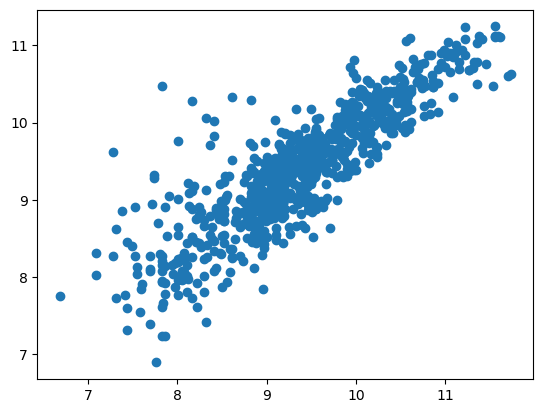

In [26]:
#plotting test
plt.scatter(y_test,yhat_test)
plt.show()

In [27]:
#manual testing
yhat_test = reg.predict(x_test)

df_test = pd.DataFrame()
df_test["Target"] = np.exp(y_test)
df_test["Predictions"] = np.exp(yhat_test)
df_test["Residual"] = df_test["Predictions"] - df_test["Target"]
df_test["Diff%"] = np.absolute(df_test["Residual"] / df_test["Target"] * 100)
df_test = df_test.reset_index(drop=True)
df_test, df_test.describe()

(      Target   Predictions      Residual      Diff%
 0     7000.0  11572.705763   4572.705763  65.324368
 1    59999.0  45201.290149 -14797.709851  24.663261
 2     2600.0   3439.409589    839.409589  32.284984
 3    47600.0  35362.673803 -12237.326197  25.708668
 4     3350.0   2904.714545   -445.285455  13.292103
 ..       ...           ...           ...        ...
 769  17700.0  12503.065270  -5196.934730  29.361213
 770  16400.0  19284.405979   2884.405979  17.587841
 771  15500.0  16602.749721   1102.749721   7.114514
 772   8550.0   7683.135857   -866.864143  10.138762
 773  11800.0   9019.137793  -2780.862207  23.566629
 
 [774 rows x 4 columns],
               Target   Predictions      Residual        Diff%
 count     774.000000    774.000000    774.000000   774.000000
 mean    17943.516305  16506.743025  -1436.773280    40.380745
 std     18677.461171  13520.478978   9535.678977    80.777533
 min       800.000000    985.832859 -83856.149286     0.200603
 25%      7000.000000 